In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
descriptive_prompt_5 =  "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time."
non_descriptive_prompt_5 = "Simulate 1LYZ for 1 ps at 300 K. Tell me how many residues are in the chains and beta sheets, and compute the RMSD and radius of gyration of the simulation."

Required Tasks:
- Download
- SS Analysis
- Simulation
- RMSD
- Rgy

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_1.run(descriptive_prompt_5)

Thought: To complete all the tasks, I'll need to use several tools in sequence. Let's start with downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's analyze the structure to determine the number of residues in the chains and beta sheets.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_003702",
        "top_file": "1LYZ_003702",
        "target_frames": "first"
    }
}
```

Thought: We've obtained information about the secondary structure of 1LYZ. Now, let's proceed with the simulation, RMSD computation, and radius of gyration calculation.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_003702",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod"

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [5]:
registry = agent_1.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_003702: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_003702
 rec0_003705: dssp values for trajectory with id: 1LYZ_003702
 1LYZ_003717: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_003723: Initial positions for simulation sim0_003723
 sim0_003723: Basic Simulation of Protein 1LYZ_003717
 rec0_003724: Simulation trajectory for protein 1LYZ_003717 and simulation sim0_003723
 rec1_003724: Simulation state log for protein 1LYZ_003717 and simulation sim0_003723
 rec2_003724: Simulation pdb frames for protein 1LYZ_003717 and simulation sim0_003723
 rmsd_003723: RMSD for 003723
 fig0_003844: RMSD plot for 003723
 rgy_rec0_003724: Radii of gyration per frame for rec0_003724


In [6]:
traj_path = registry.get_mapped_path("rec0_003705")
top_path = registry.get_mapped_path("top_sim0_003723")

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(registry.get_mapped_path("rmsd_003723"))
assert os.path.exists(registry.get_mapped_path("rgy_rec0_003724"))
path = registry.get_mapped_path("1LYZ_003717")
traj = md.load(path)
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  1
Number of sheets:  14
Number of helices:  50
Number of coils:  65


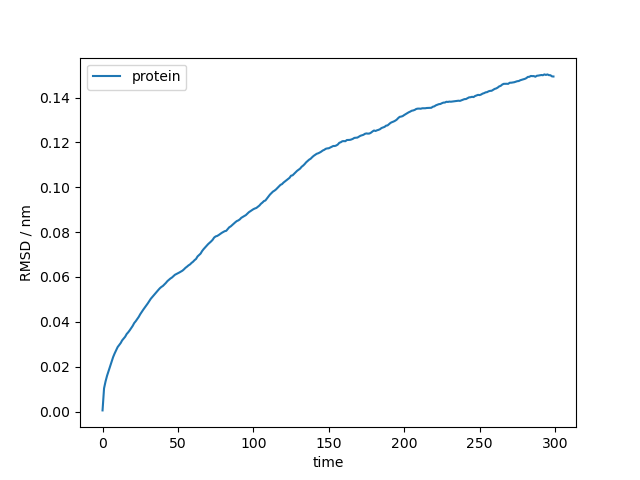

In [7]:
#plot rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_003844'))

In [8]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools)
agent_2.run(non_descriptive_prompt_5)

Thought: To answer this question, we need to follow several steps. First, we need to download the PDB file for 1LYZ, then set up and run a simulation, and finally analyze the results. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run a short simulation for 1 ps at 300 K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_004326",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 0.000001
        },
        "integrator_params": {
            "integrator_type": "L

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [9]:
registry = agent_2.path_registry
print(registry.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_004326: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_004326
 1LYZ_004340: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_004346: Initial positions for simulation sim0_004346
 sim0_004346: Basic Simulation of Protein 1LYZ_004340
 rec0_004346: Simulation trajectory for protein 1LYZ_004340 and simulation sim0_004346
 rec1_004346: Simulation state log for protein 1LYZ_004340 and simulation sim0_004346
 rec2_004346: Simulation pdb frames for protein 1LYZ_004340 and simulation sim0_004346
 rec0_004538: dssp values for trajectory with id: rec2_004346
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_004614: RMSD plot for 1LYZ
 rgy_rec2_004346: Radii of gyration per frame for rec2_004346


In [10]:
traj_path = registry.get_mapped_path("rec0_004346")
top_path = registry.get_mapped_path("top_sim0_004346")

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(registry.get_mapped_path("rmsd_1LYZ"))
assert os.path.exists(registry.get_mapped_path("rgy_rec2_004346"))
path = registry.get_mapped_path("1LYZ_004340")
traj = md.load(path)
#get dssp 
number_of_chains = traj.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of chains: ",number_of_chains)
print("Number of sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of chains:  1
Number of sheets:  14
Number of helices:  50
Number of coils:  65


In [12]:
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry)
dssp._run(traj_file="rec2_004346", top_file="top_sim0_004346", target_frames="all")

"{'residues in helix': 15319, 'residues in strand': 3576, 'residues in coil': 19805, 'residues not assigned, not a protein residue': 0}"

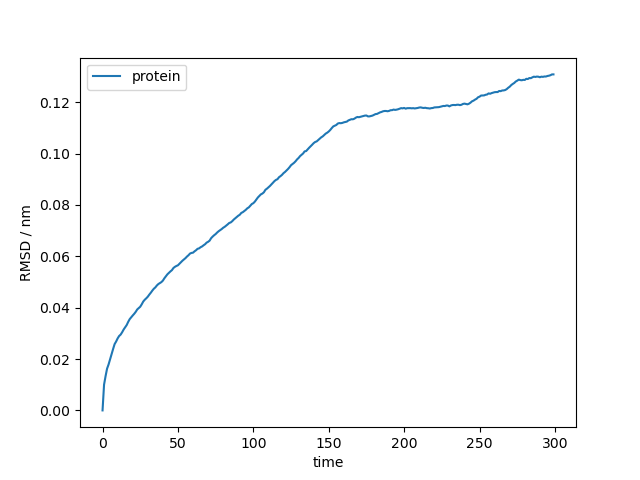

In [11]:
#plot rmsd
from IPython.display import Image
Image(filename=registry.get_mapped_path('fig0_004614'))